Product reviews are becoming more important with the evolution of traditional brick and mortar retail stores to online shopping.

Consumers are posting reviews directly on product pages in real time. With the vast amount of consumer reviews, this creates an opportunity to see how the market reacts to a specific product.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(42) # seeding random number generator

df = pd.read_csv('../input/amazon-product-reviews/amazon.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


# Describing the Dataset

In [2]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [5]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


# Visualizing the distributions of numerical variables:

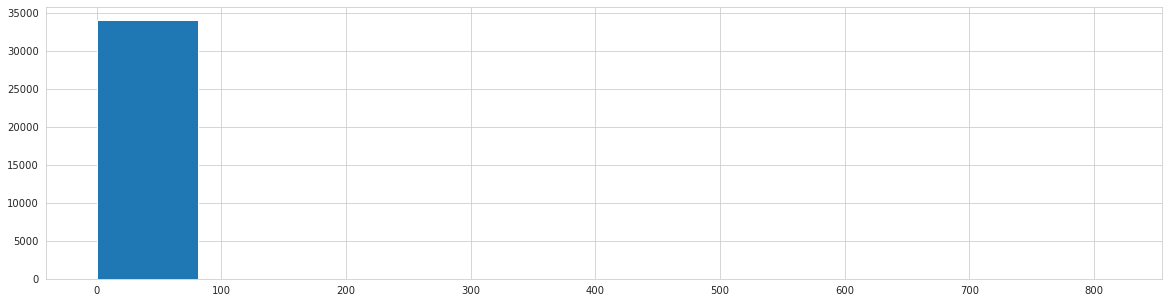

In [6]:
data["reviews.numHelpful"].hist(figsize=(20,5))
plt.show()

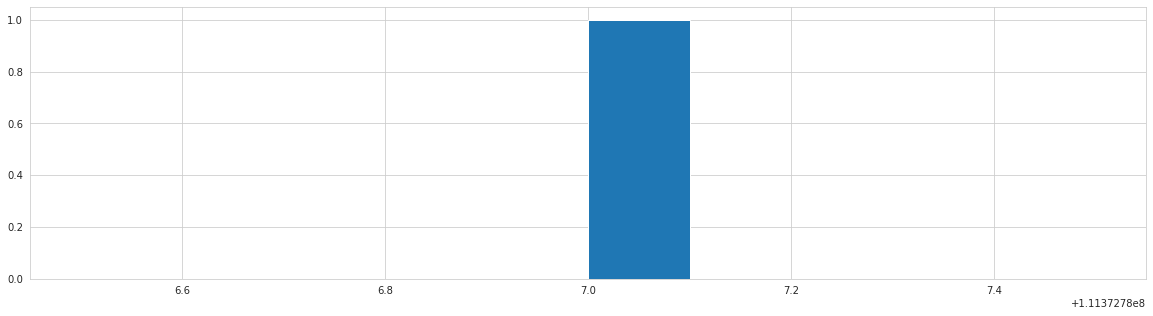

In [7]:
data["reviews.id"].hist( figsize=(20,5))
plt.show()

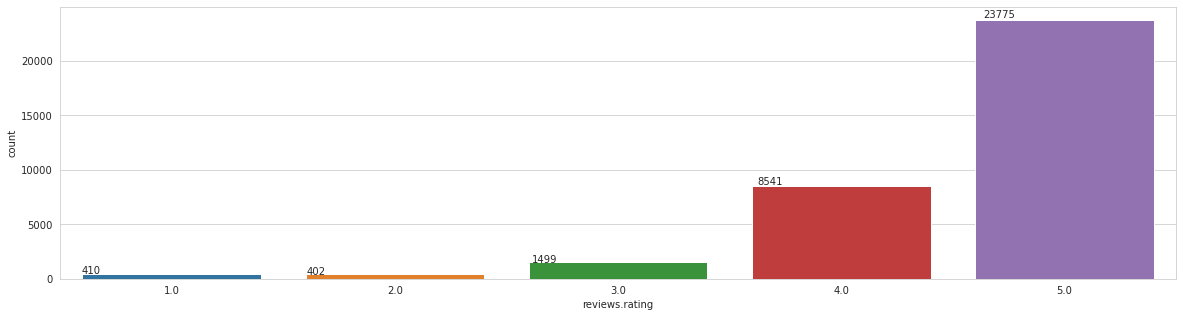

In [8]:
plt.figure(figsize=(20,5))
ax1=sns.countplot(x="reviews.rating", data=data)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()


# Split the data into Train and Test

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before : {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After  : {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Before : 34660
After  : 34627


In [10]:
print(len(strat_train))
print(len(strat_test))
round((strat_test["reviews.rating"].value_counts()* 100/len(strat_test)),2)

27701
6926


5.0    68.81
4.0    24.56
3.0     4.09
2.0     1.29
1.0     1.17
Name: reviews.rating, dtype: float64

# Data Exploration

In [11]:
reviews = strat_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
27895,AVpfl8cLLJeJML43AE3S,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-08-16T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,This is my new favorite device. While not perf...,My new favorite product,NaN,NaN,JefferyP
9252,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-06T00:00:00.000Z,2017-05-21T01:38:14Z,"2017-04-30T00:12:00.000Z,2017-06-07T08:16:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Bought this for reading but enjoy all the feat...,Awesome tablet,NaN,NaN,John
1955,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-25T00:00:00.000Z,2017-05-21T06:01:32Z,"2017-04-30T00:44:00.000Z,2017-06-07T09:04:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Excellent product. The screen is very easy to ...,Gave as a gift and they love it.,NaN,NaN,Cheryl
33173,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-10-20T00:00:00.000Z,2017-09-20T05:35:53Z,"2017-08-25T22:04:57.994Z,2017-08-19T09:35:26.8...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/4370400/review...,i love the box better than the stick. For one ...,love the programming,NaN,NaN,ElTigre
14385,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-27T00:00:00.000Z,2017-05-21T04:07:12Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,1.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,Screen quality and size is good. Lightweight a...,reasonably priced tablet,NaN,NaN,glm216


In [12]:
len(reviews["name"].unique())

47

In [13]:
len(reviews["asins"].unique())

36

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 27895 to 27018
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27674 non-null  object 
 1   name                  22303 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27674 non-null  object 
 4   categories            27674 non-null  object 
 5   keys                  27674 non-null  object 
 6   manufacturer          27674 non-null  object 
 7   reviews.date          27651 non-null  object 
 8   reviews.dateAdded     19237 non-null  object 
 9   reviews.dateSeen      27674 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27239 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27291 non-null  float64
 14  reviews.rating        27674 non-null  float64
 15  reviews.sourceU

In [15]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, Ama...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Paperwhite E-reader - White, 6 High-Re...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [New Amazon Kindle Fire Hd 9w Powerfast Adapte...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

In [16]:
different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)


New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
Echo (White),,,
Echo (White),,,
nan
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Echo (Whit

In [17]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2299
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2021
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           262
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           102
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

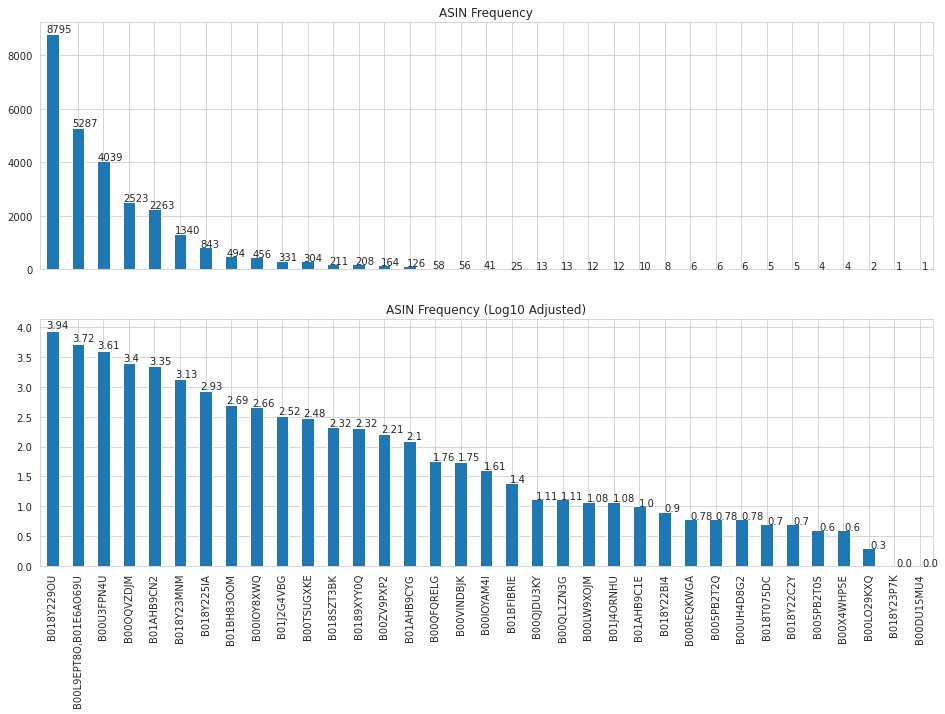

In [18]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
for p in ax2.patches:
    ax2.annotate(str(round((p.get_height()),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

# Entire training dataset average rating

In [19]:
reviews["reviews.rating"].mean()

4.585278600852786

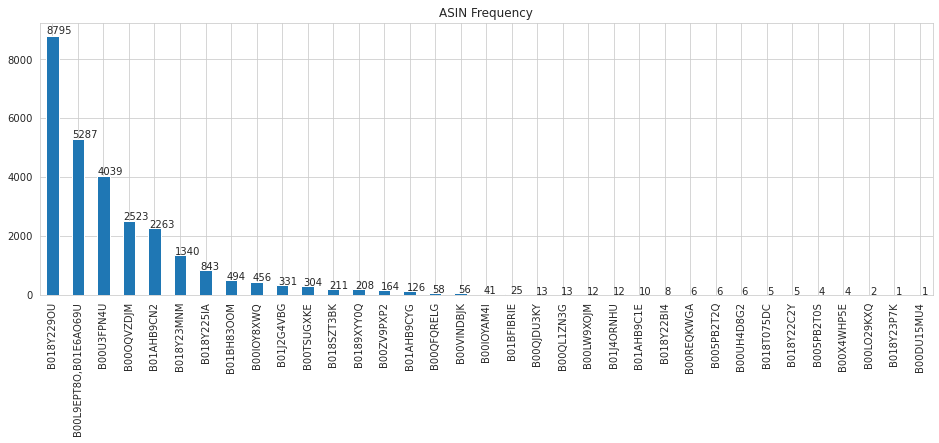

In [20]:
asins_count_ix = reviews["asins"].value_counts().index
fig = plt.figure(figsize=(16,5))
ax=reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

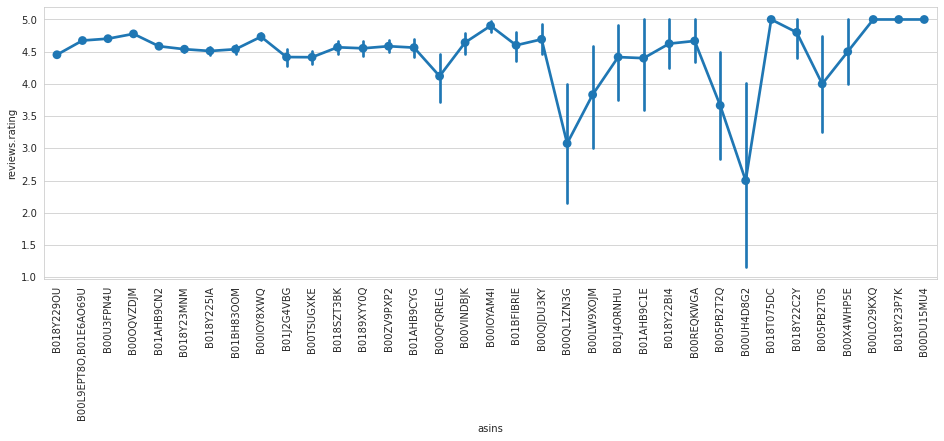

In [21]:
fig = plt.figure(figsize=(16,5))
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis

In [22]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
print(strat_train["Sentiment"][:15])

27895    Positive
9252     Positive
1955     Positive
33173    Positive
14385    Positive
11337    Positive
25289    Positive
11280    Positive
9329     Positive
11394    Positive
27278    Positive
14660    Positive
23561    Positive
21529     Neutral
1087     Positive
Name: Sentiment, dtype: object


In [23]:
round((strat_train["Sentiment"].value_counts()*100/len(strat_train)),2)

Positive    93.24
Neutral      4.38
Negative     2.28
Name: Sentiment, dtype: float64

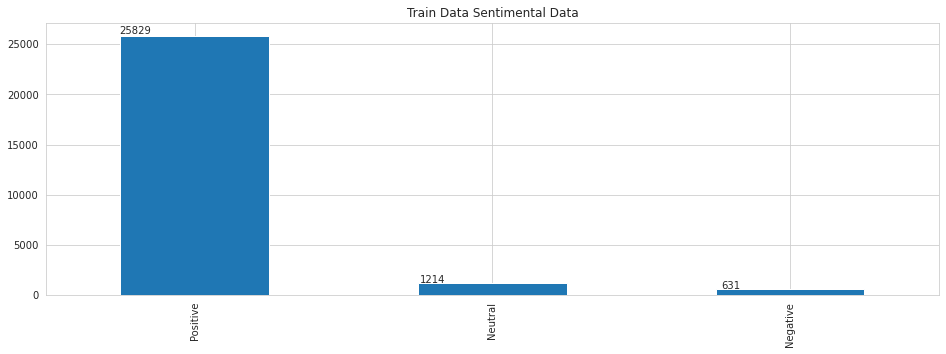

In [24]:
fig = plt.figure(figsize=(16,5))
ax=strat_train["Sentiment"].value_counts().plot(kind="bar", title="Train Data Sentimental Data")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [25]:
round((strat_test["Sentiment"].value_counts()*100/len(strat_test)),2)

Positive    93.37
Neutral      4.09
Negative     2.45
Name: Sentiment, dtype: float64

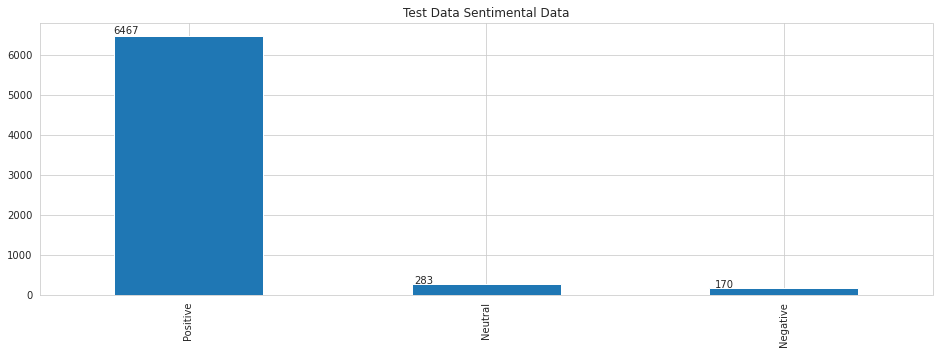

In [26]:
fig = plt.figure(figsize=(16,5))
ax=strat_test["Sentiment"].value_counts().plot(kind="bar", title="Test Data Sentimental Data")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()